# Model Performance Comparison

### Performance Evaluation Metrics
Accuracy can be a misleading metric for imbalanced data sets, as we have discussed previously in this report. As our data set has a class balance of approximately 81.1% (not delayed) / 18.9% (delayed), a classifer that simply predicts every instance as not delayed achieves an accuracy of 81.1%, even though this would clearly be a poor classifer. Therefore, to evaluate and compare the performances of our models, we rely on the evaluation metrics that are not affected by this problem.


We give the definition below of accuracy, precision, recall and the F1-score.[1]

- Precision = $\frac{TP}{TP + FP} $ 
$\newline$
- Recall = $\frac{TP}{TP + FN}$
$\newline$
- F1-score = $\frac{2TP}{2TP + FP + FN} $  (harmonic mean of Precision and Recall)
$\newline$
- Balanced accuracy = $\frac{TPR+TNR}{2}$

Where,
$\newline$
- TP (True positive) = The number of items correctly labelled as belonging to the positive class
$\newline$
- FP (False positive) = The number of items incorrectly labelled as belonging to the positive class
$\newline$
- TN (True negative) = The number of items correctly labelled as belonging to the negative class
$\newline$
- FN (False negative) = The number of items incorrectly labelled as belonging to the negative class
$\newline$
- TPR (True positive rate) = $\frac{TP}{TP + FN} $
$\newline$
- TNR (True negative rate) = $\frac{TN}{TN + FP} $
$\newline$

However, it is important to note that precision and recall are effective performance metrics when considered together and not in isolation. For example, a model with high precision could be discarding a significant number of actual positive instances, leading to poor recall. Conversely, a model with high recall could have numerous false positives, leading to poor precision.


To evaluate our models we have trained each one on the original imbalanced data set, and on the balanced data set created using SMOTE. We then test how well each model performs in predicting the test data from the imbalanced data set and compare their performances side by side.

In [55]:
import pandas as pd

Logistic_balanced_Predictions = pd.read_csv("Logistic_Balanced_Predictions.csv")
Logistic_imbalanced_Predictions = pd.read_csv("Logistic_Imbalanced_Predictions.csv")
Logistic_balanced_Probabilities = pd.read_csv("Logistic_balanced_probabilities.csv")
Logistic_imbalanced_Probabilities = pd.read_csv("Logistic_imbalanced_probabilities.csv")

knn_imbalanced_Predictions = pd.read_csv("predicted_normal.csv")
knn_balanced_Predictions = pd.read_csv("predicted_smote.csv")
knn_imbalanced_Probabilities = pd.read_csv("pred_probs_knn_original.csv")
knn_balanced_Probabilities = pd.read_csv("pred_probs_knn_smote.csv")

GBT_imbalanced_Predictions = pd.read_csv("GBT_Prediction_normal.csv")
GBT_balanced_Predictions = pd.read_csv("GBT_Prediction_smote.csv")
GBT_imbalanced_Probabilities = pd.read_csv("GBT_Predicted_probs_normal.csv")
GBT_balanced_Probabilities = pd.read_csv("GBT_Predicted_probs_smote.csv")

NaiveBayes_imbalanced_Predictions = pd.read_csv("NaiveBayes_Unbalanced_Predictions.csv")
NaiveBayes_balanced_Predictions = pd.read_csv("NaiveBayes_Balanced_Predictions.csv")
NaiveBayes_imbalanced_Probabilities = pd.read_csv("NaiveBayes_Unbalanced_Probabilities.csv")
NaiveBayes_balanced_Probabilities = pd.read_csv("NaiveBayes_Balanced_Probabilities.csv")

y_test = pd.read_csv("y_test.csv")

In [56]:
balanced_predictions = [
    ['Logistic Regression (balanced)', Logistic_balanced_Predictions],
    ['K-NN (balanced)', knn_balanced_Predictions.iloc[:, 1]],
    ['Gradient Boosted Trees (balanced)', GBT_balanced_Predictions],
    ['NaiveBayes (balanced)', NaiveBayes_balanced_Predictions]
]

In [57]:
imbalanced_predictions = [
    ['Logistic Regression (imbalanced)', Logistic_imbalanced_Predictions],
    ['K-NN (imbalanced)', knn_imbalanced_Predictions.iloc[:, 1]],
    ['Gradient Boosted Trees (imbalanced)', GBT_imbalanced_Predictions],
    ['NaiveBayes (imbalanced)', NaiveBayes_imbalanced_Predictions]
]

In [58]:
balanced_probabilities = [
    ['Logistic Regression (balanced)', Logistic_balanced_Probabilities],
    ['K-NN (balanced)', knn_balanced_Probabilities.iloc[:, 1]],
    ['Gradient Boosted Trees (balanced)', GBT_balanced_Probabilities],
    ['NaiveBayes (balanced)', NaiveBayes_imbalanced_Probabilities]
]

In [59]:
imbalanced_probabilities = [
    ['Logistic Regression (imbalanced)', Logistic_imbalanced_Probabilities],
    ['K-NN (imbalanced)', knn_imbalanced_Probabilities.iloc[:, 1]],
    ['Gradient Boosted Trees(imbalanced)', GBT_imbalanced_Probabilities],
    ['NaiveBayes (imbalanced)', NaiveBayes_imbalanced_Probabilities]
]

In [60]:
from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score

def calculate_metrics(predictions):
    metrics = pd.DataFrame(columns=['Model','Precision','Recall','F1-Score','Balanced Accuracy'])

    for y_pred in predictions:
        name = y_pred[0]
        precision = precision_score(y_test, y_pred[1], average = 'weighted')
        recall = recall_score(y_test, y_pred[1], average = 'weighted')
        f1 = f1_score(y_test, y_pred[1], average = 'weighted')
        balanced_acc = balanced_accuracy_score(y_test, y_pred[1])

        metrics = metrics.append({
            'Model': name,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Balanced Accuracy': balanced_acc
        }, ignore_index=True)
    return metrics


#### Models Trained on Imbalanced Data Set 

In [61]:
imbalanced_table = calculate_metrics(imbalanced_predictions)

properties = {"border": "3px solid gray", "color": "black", "font-size": "16px" }
styled_imbalanced_table = imbalanced_table.style.set_properties(**properties)
styled_imbalanced_table.set_caption('Evaluation Metrics Table (Imbalanced Data Set)')

styled_imbalanced_table.set_table_styles([
    {'selector': 'caption', 'props': [('color', 'black'), ('font-size', '20px'), ('text-align', 'center')]},
])

/tmp/ipykernel_140/215884532.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({
/tmp/ipykernel_140/215884532.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({
/tmp/ipykernel_140/215884532.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({
/tmp/ipykernel_140/215884532.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({


,Model,Precision,Recall,F1-Score,Balanced Accuracy
0,Logistic Regression (imbalanced),0.731601,0.809807,0.728976,0.503004
1,K-NN (imbalanced),0.781025,0.815882,0.752062,0.531130
2,Gradient Boosted Trees (imbalanced),0.787986,0.817441,0.792142,0.606852
3,NaiveBayes (imbalanced),0.723858,0.792063,0.741160,0.522274


#### Models Trained on Balanced Data Set 

In [62]:
balanced_table = calculate_metrics(balanced_predictions)

properties = {"border": "3px solid gray", "color": "black", "font-size": "16px" }
styled_balanced_table = balanced_table.style.set_properties(**properties)
styled_balanced_table.set_caption('Evaluation Metrics Table (Balanced Data Set)')

styled_balanced_table.set_table_styles([
    {'selector': 'caption', 'props': [('color', 'black'), ('font-size', '20px'), ('text-align', 'center')]},
])


/tmp/ipykernel_140/215884532.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({
/tmp/ipykernel_140/215884532.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({
/tmp/ipykernel_140/215884532.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({
/tmp/ipykernel_140/215884532.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({


,Model,Precision,Recall,F1-Score,Balanced Accuracy
0,Logistic Regression (balanced),0.742686,0.609104,0.650380,0.587730
1,K-NN (balanced),0.802885,0.675765,0.709944,0.694768
2,Gradient Boosted Trees (balanced),0.908225,0.901487,0.903971,0.867246
3,NaiveBayes (balanced),0.728742,0.678123,0.699194,0.564115


### Discussion

Interestingly, balancing the data set has improved the balanced accuracy and precision in all models but weakened the recall and F1-score of all methods except Gradient Boosted Trees. It makes sense that Gradient Boosted Trees sees dramatic improvement in all areas as it has parameters that are custom made for the balanced data set. Lowered recall and F1-scores for the other models could be caused by the fact that they are overfitting to the SMOTE introduced synthetic datapoints and unable to make the generalization as well to real-world data. Its worth noting that before its hyperparameters were tuned to the SMOTE data, the Gradient Boosted Trees model also had reduced recall and F1-scores when trained on the balanced data.

Its good to see that the balanced accuracy has increased for all models suggesting that balancing the data has an overall positive impact on the models performance. For the Recall to drop and the balanced accuracy to rise the models must be accuratly predicting more true negatives. However, this is coming with less correct identifications of true positives.

There is variability in precision among the models in the second table. Gradient Boosted Trees demonstrates the highest precision when trained on both datasets. This significant increase in precision for Gradient Boosted Trees suggests it makes significantly fewer false positive predictions when trained on the balanced data, especially when positive predictions are made, leading to a more reliable performance. 
 
Overall, when trained on the imbalanced data none of the models perform particularly well. However, with the balanced dataset Gradient Boosted Trees and K-NN see huge improvements in their balanced accuracy suggesting that balancing the data is an excellent step towards acheiving the most accurate models. The results for Naive Bayes and Logistic Regression are still positive but less conclusive.

### Graphical Performance Evaluation

In addition to performance metrics, we use graphical methods to compare and evaluate the performances of our models, in particular ROC and Precision-Recall curves. We provide detail about each of these methods.

#### ROC (Receiver Operator Characteristic) curves

In binary classification, the model produces probabilities that need to be converted into class predictions. A threshold is applied to these probabilities to determine the classification of each instance. The ROC curve is generated by changing this threshold. On the y-axis, the True Positive Rate (TPR) (defined above) also known as "Sensitivity" is plotted. On the x-axis, the False Positive Rate (FPR), which is 1 - Specificity, is plotted. By adjusting the classification threshold, the model generates different values TPR and FPR for each threshold. Furthermore, the area under the ROC curve (AUC) quantifies the model's performance. A higher AUC value (closer to 1) signifies better discrimination ability of the model. A perfect model would produce a  curve that goes straight up the y-axis and then along the x-axis, indicating that it achieves 100% sensitivity and 0% false positives

#### Precision-Recall curves

Similar to the ROC curve, the Precision-Recall curve is generated by changing the classification thresholds for the probabilities generated by the model. However, instead of the True Positive Rate (TPR) and False Positive Rate (FPR), the Precision is plotted on the y-axis and the Recall is plotted on the x-axis. Similary, a the area under the PR curve quantitfies the model's performance and a higher AUC value indicates better overall performance of the model. An idea model would produce a curve that is a right angle in the upper right corner with precision and recall values of 1, indicating that it achieves 100% precision for all levels of recall.[3]

Precision-Recall curves are found to be more informative than ROC curves for evaluating binary classifiers on imbalanced data sets. In this case, ROC plots may be visually misleading which could lead to false conclusions about the classification performance. Where as, Precision-Recall curves are more suitable when dealing with highly imbalanced datasets because they consider the proportion of correctly predicted positive instances and the ability to capture the actual positive instances. [2]

Therefore, in light of this, more weight will be given to the conclusions drawn from the Precision-Recall curves than those drawn from the ROC curves, since the test sets we are predicting are generated from the original imbalanced data.

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(probabilities, title):
    plt.figure(figsize=(8, 6))

    for model_name, y_probs in probabilities:
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

def plot_precision_recall_curves(probabilities, title):
    plt.figure(figsize=(8, 6))

    for model_name, y_probs in probabilities:
        precision, recall, _ = precision_recall_curve(y_test, y_probs)
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, lw=2, label=f'{model_name} (AUC = {pr_auc:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend(loc='lower left')
    plt.show()

### ROC (Receiver Operator Characteristic) Curves

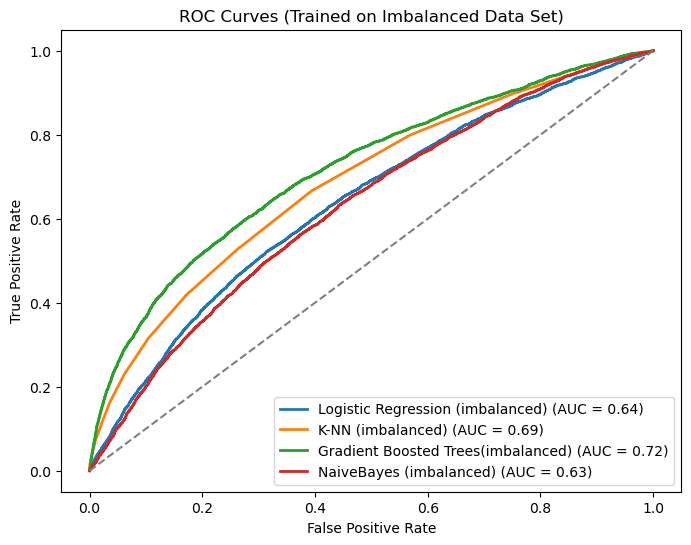

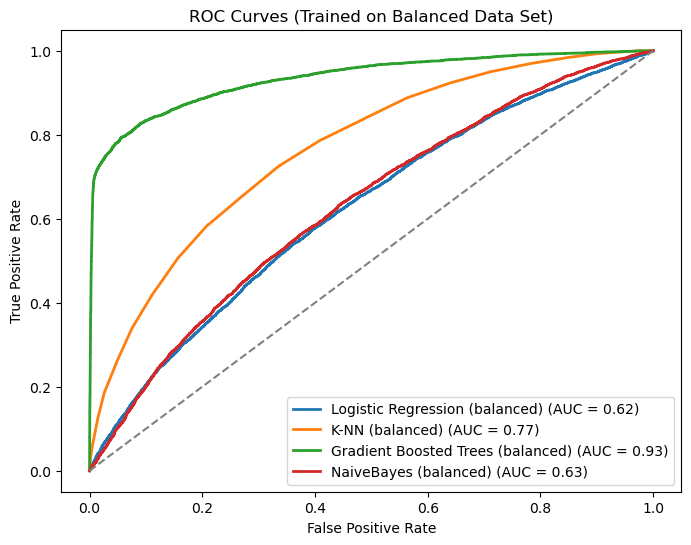

In [65]:
plot_roc_curves(imbalanced_probabilities, title = "ROC Curves (Trained on Imbalanced Data Set)")

plot_roc_curves(balanced_probabilities, title = "ROC Curves (Trained on Balanced Data Set)")

### Precision-Recall Curves

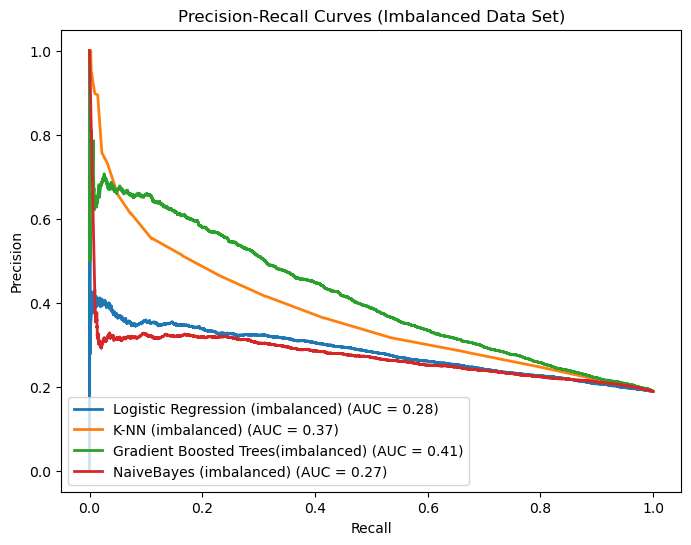

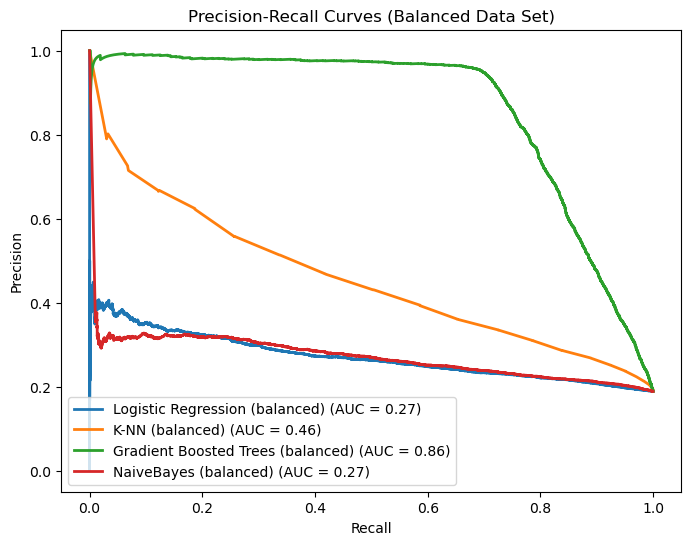

In [66]:
plot_precision_recall_curves(imbalanced_probabilities, title = "Precision-Recall Curves (Imbalanced Data Set)")

plot_precision_recall_curves(balanced_probabilities, title = "Precision-Recall Curves (Balanced Data Set)")

### Discussion

In both ROC plots, we see that Gradient Boosted Trees is more towards the left-top corner than the other models, followed by Logistic Regression and Naive Bayes with similar performances. However, in the graph of models trained on balanced data, the seperation between these graphs is much greater with Gradient Boosted Trees and K-NN curves being much further towards the left-top corner. Gradient Boosted Trees shows a significant improvement with an AUC score of 0.93 and a curve that is much nearer the left-top corner. However, as we noted previously, the ROC curve is an unreliable performance measure for imbalanced data sets and as we are testing on imbalanced data, we verify this conclusion by examining the Precision-Recall plots.

In both Precision-Recall plots, we observe that Gradient Boosted Trees is positioned more towards the top-right corner compared to the other models, indicating its better performance in capturing positive instances while preserving high precision. This is followed most closely by K-NN then Logistic Regression and Naive Bayes, displaying the worst performances. In the precision-recall curve for the models trained on the imbalanced data, K-NN displays higher precision scores at lower recall values compared to Gradient Boosted Trees. This suggests that at very low recall values, K-NN maintains a cautious approach in classifying positive instances, potentially resulting in fewer false positives at the expense of missing some true positives. In the Precision-Recall curves of models trained on balanced data, the separation among these curves is significantly more pronounced. Both Gradient Boosted Trees and K-NN curves are noticeably further towards the top-right corner compared to the other models. The significant shift towards the top-right corner of the Gradient Boosted Trees Precision-Recall curve strengthens the indication that this is the best-performing model in capturing positive instances while maintaining high precision, which is supported by its AUC score of 0.86.

Therefore, these graphical performance evaluations support our earlier conclusions from the performance metrics tables, which are that all the models have a significantly improved performance when trained on balanced data and that Gradient Boosted Trees demonstrate the best performance out of all of the models.

# Conclusion

This report delved into the binary classification of flight delays from JFK Airport, employing various machine learning models, including Logistic Regression, K-NN, Gaussian Naive Bayes, and Decision Tree methods. Throughout the project, methodologies were applied to enhance model performance, such as hyperparameter tuning as well as more uncommon techniques like Bayesian Optimisation in the Decision Trees section and addressing the zero-probability issue in the Naive Bayes section.

Given the inherent class imbalance in the dataset, a primary objective was to investigate strategies to handle this imbalance. After exploring different methods, we adopted the SMOTE method to rebalance the data. We then performed a comparative analysis between models trained on the original imbalanced dataset and the balanced dataset. Subsequently, these models were evaluated on the imbalanced testing dataset. The findings confirm that models trained on balanced datasets significantly outperformed those trained on the original imbalanced data. Overall, and particularly evident with the balanced data, Gradient Boosted Trees demonstrated the most robust and reliable performance compared to all of the models.


### References


[1] - Google for Developers. Classification: Precision and Recall | Machine Learning. [online] Available at: https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall?hl=en.

[2] - Saito T, Rehmsmeier M. The precision-recall plot is more informative than the ROC plot when evaluating binary classifiers on imbalanced datasets. PLoS One. 2015 Mar 4;10(3):e0118432. doi: 10.1371/journal.pone.0118432. PMID: 25738806; PMCID: PMC4349800.

[3] - Brownlee, J. (2020). ROC Curves and Precision-Recall Curves for Imbalanced Classification. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/.